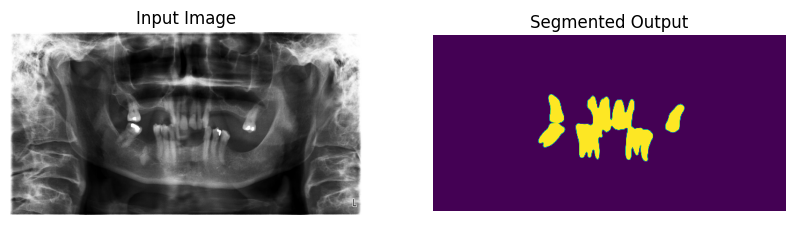

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import onnxruntime as ort
import torchvision
import albumentations as A

import cv2
from albumentations.pytorch import ToTensorV2

from training import DentalModel

device = "cuda" if torch.cuda.is_available() else "cpu"

simple_transform = A.Compose([
    A.Resize(height=256, width=512),  # Resize to 256x512
    A.Normalize(mean=(0.0, 0.0, 0.0), std=(1.0, 1.0, 1.0)),  # Normalize image to 0-1 range
    ToTensorV2()
])

image_path = 'data/Radiographs/100.JPG'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
augmented = simple_transform(image=image)
target = augmented['image'].unsqueeze(0).cpu().numpy()

# Load the ONNX model
onnx_model_path = "upp_resnet_model.onnx"
ort_session = ort.InferenceSession(onnx_model_path)

#Run inference
ort_inputs = {'input': target}
ort_outs = ort_session.run(None, ort_inputs)
output = ort_outs[0]

# Postprocess the output
output = output.squeeze()

# Visualize the segmented output
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Output')
plt.imshow(output)
plt.axis('off')

plt.show()